# Federico Andrucci - 000105....

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from plot_silhouette import plot_silhouette

# Variables
file_name = 'country_stats.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

1. load the data into a dataframe df, show its size and head, eliminate
the rows containing null values and show the number of remaining
rows (2pt)
2. produce a pairplot of the numeric columns of df and comment
relevant situations (2pt)
3. Produce a box plot of the numeric columns of df and comment
relevant situations (2pt)
4. Produce the correlation matrix of the data and eliminate the
redundant attributes, if it is adequate (4pt)
• For example, if attributes a and b have high correlation (e.g.
absolute value higher than 0.95) one of the two can be
eliminated
• Refer to this page for the generation of the correlation matrix
5. Split the reduced data: store the first column in a vector keys and the
others in a matrix X (2pt)
6. Find the best clustering scheme for the data (possibly reduced after
step 4) with a method of your choice, plot global silhouette index for
an appropriate range of hyperparameter(s) and show the chosen
hyperparameter(s) (4pt)
7. fit the clustering scheme to y, then produce the silhouette plot using
the function plot_silhouette contained in the attached file (4pt)
8. Perform a logarithmic transformation of the data (4pt)
• This means simply to apply the log function of numpy
• If one of the columns has zero or negative values, avoid its
transformation
9. repeat point 5 and 6 above and comment the comparison with the
result of point 6

## 1. load the data into a dataframe df, show its size and head, eliminate the rows containing null values and show the number of remaining rows (2pt)

In [7]:
# load the data
df = pd.read_csv(file_name, delimiter=separator)

# show its size
print(f"The data contains {df.shape[0]} rows and {df.shape[1]} columns")

The data contains 242 rows and 8 columns


In [8]:
# show its head
df.head()

,Country Name,GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,Afghanistan,1.593680e+10,1.593680e+10,553.300289,553.300289,4.0,2.812617,28803167.0
1,Albania,1.192695e+10,1.192695e+10,4094.358832,4094.358832,45.0,-0.496462,2913021.0
2,Algeria,1.612073e+11,1.612073e+11,4463.394675,4463.394675,12.5,1.821358,36117637.0
3,American Samoa,5.760000e+08,5.760000e+08,10352.822762,10352.822762,NaN,-1.054862,55637.0
4,Andorra,3.355695e+09,3.355695e+09,39736.354063,39736.354063,81.0,-0.015393,84449.0


In [9]:
# eliminate the rows containing null values
df = df.dropna()

# show the number of remaining rows
print(f"The dataset now contains {df.shape[0]} rows")

The dataset now contains 221 rows


## 2. produce a pairplot of the numeric columns of df and comment relevant situations (2pt)

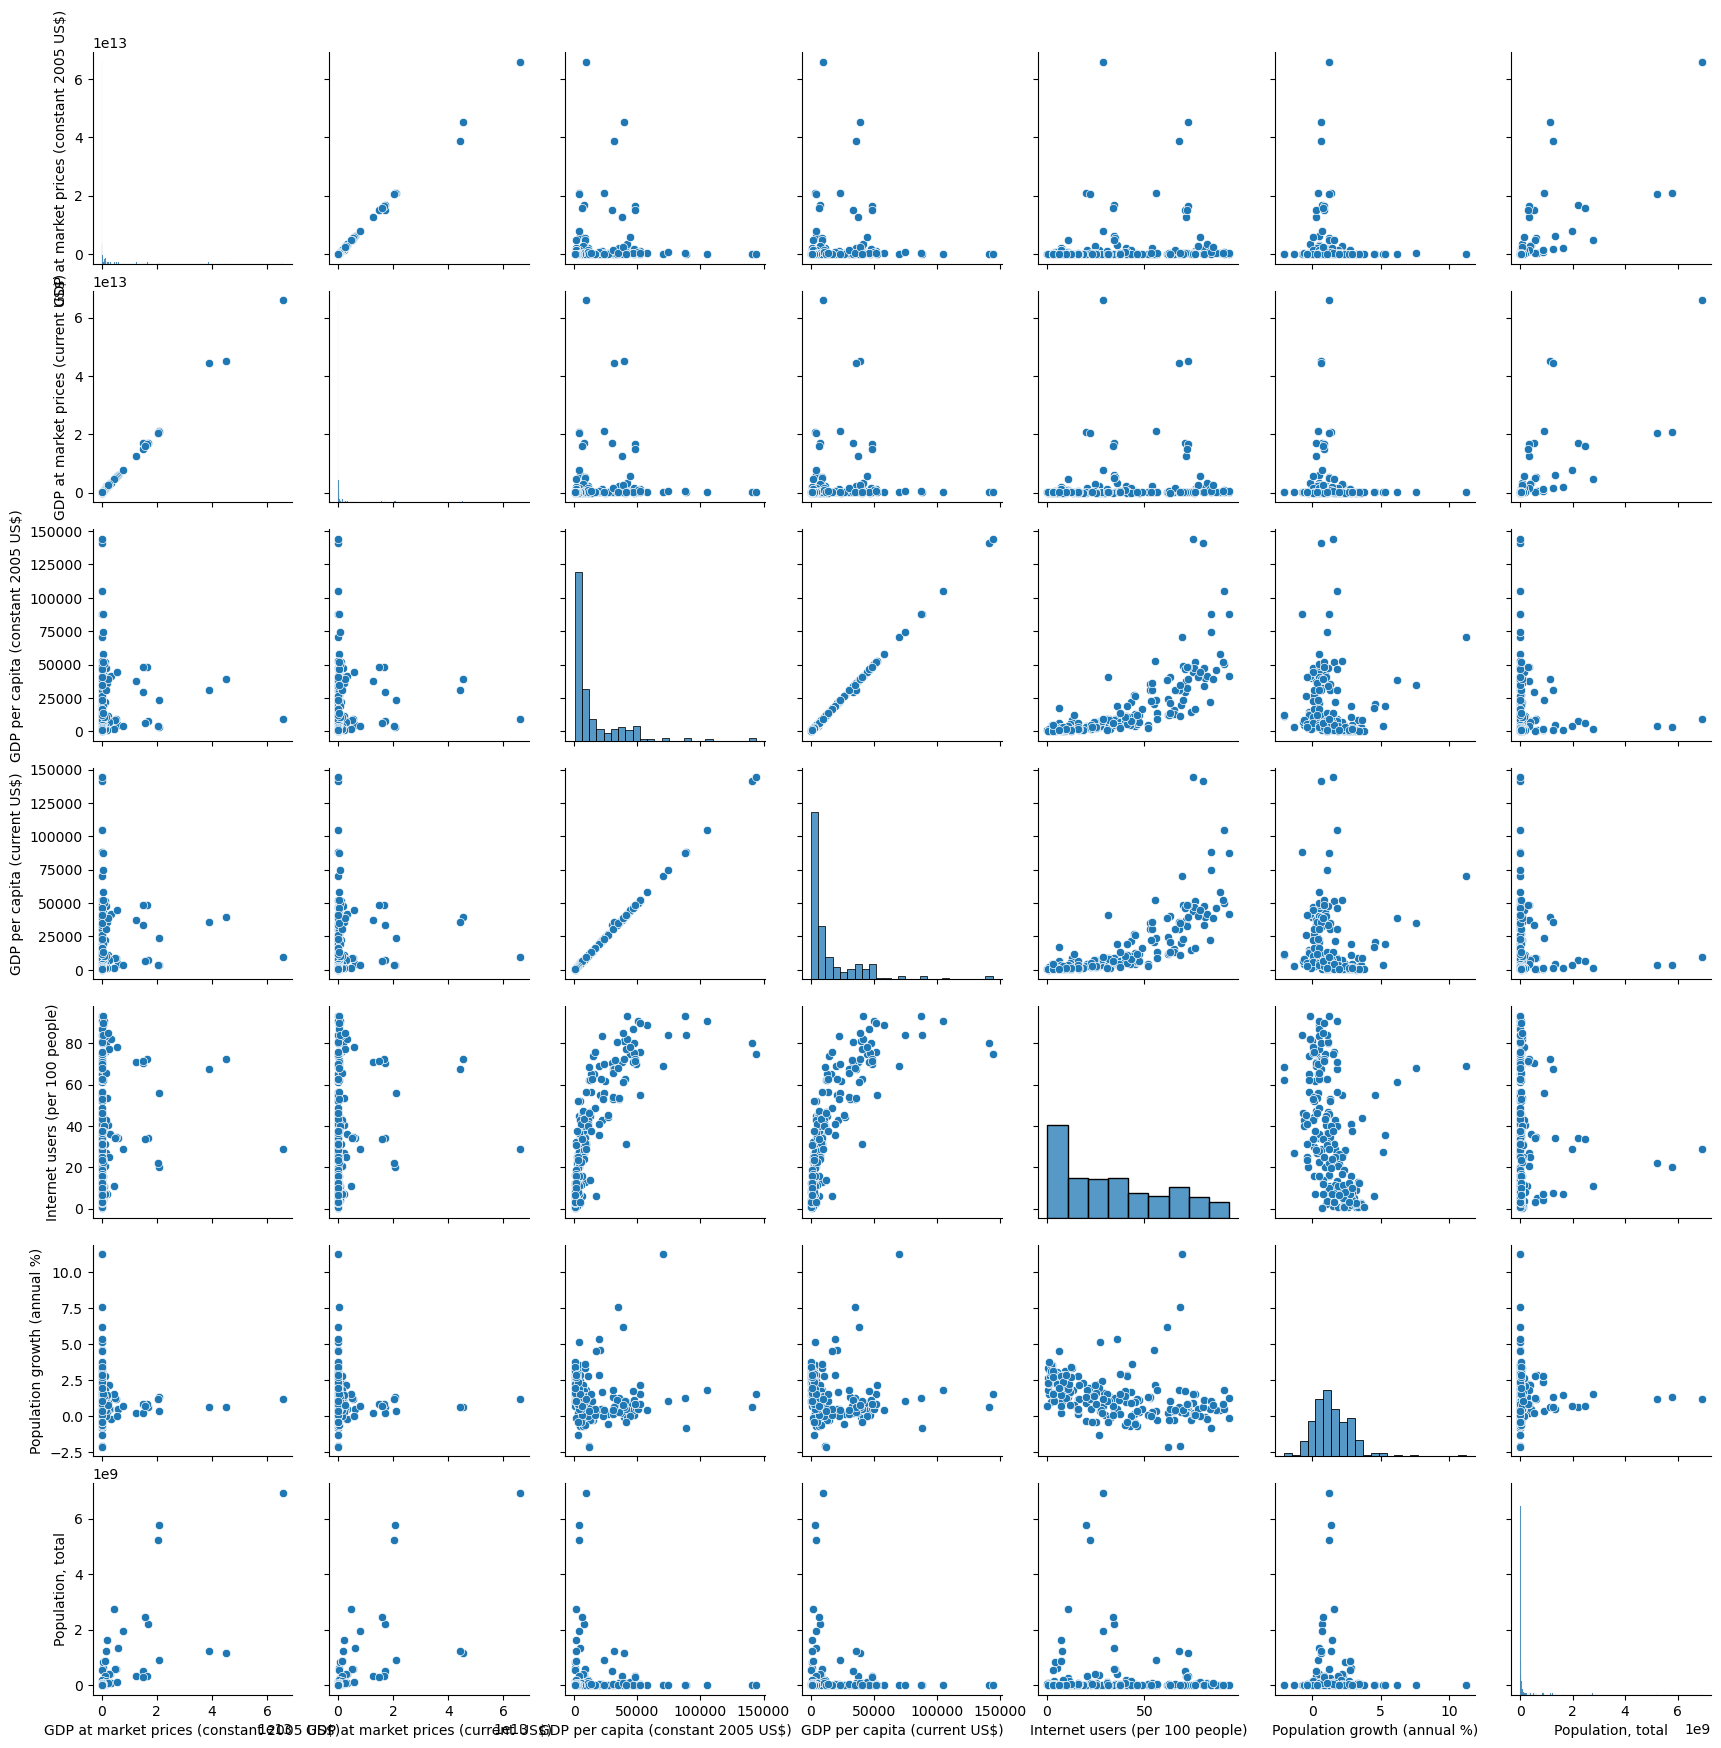

In [10]:
# We owant to produce a pairplot of only the numeric columns, so we temporary drop the 'Country Name' column
X = df.drop('Country Name', axis=1)

sns.pairplot(X)

The pairplots don't seem to highlight any particular situation, the points seem to be grouped together quite often, usually along one of the axes.

## 3. Produce a box plot of the numeric columns of df and comment relevant situations (2pt)

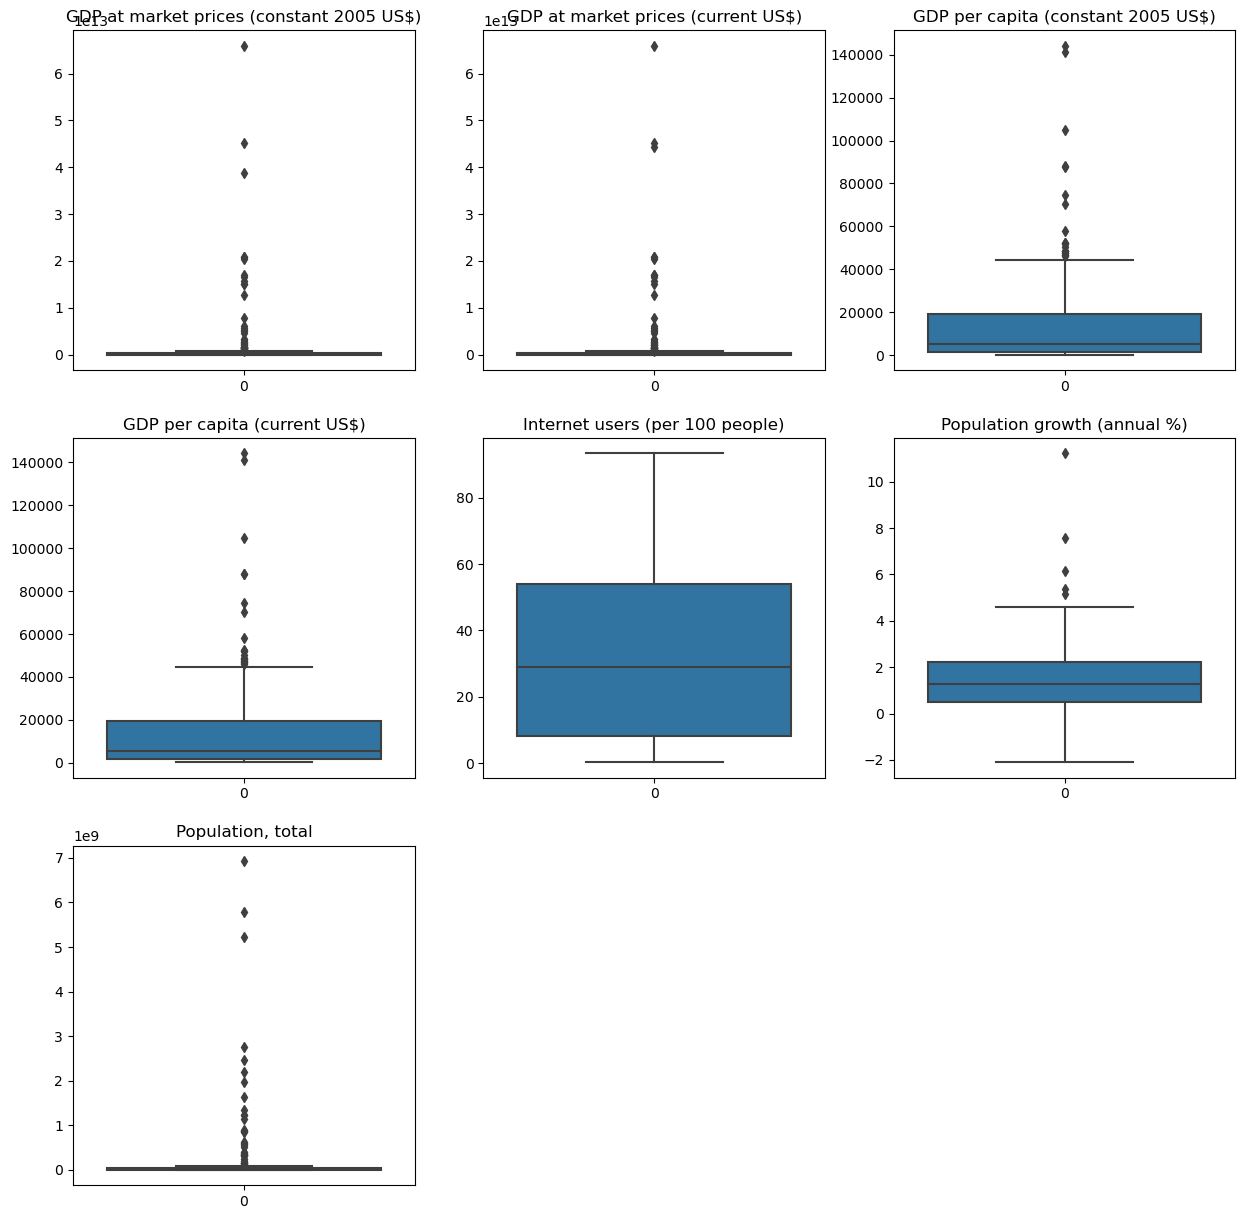

In [18]:
plt.figure(figsize=(15,15))
pos = 1
for i in X.columns:
    plt.subplot(3, 3, pos)
    plt.title(i)
    sns.boxplot(X[i])
    pos +=1

From these plots we can see that in certain plots, like "GDP at market prices (constants 2005 US$)", "GDP at market prices (current US$)" and "Population, total" the values are compressed in one area and there are quite a few outliers. A less extreme fashion can be said for the "GDP per capita (constants 2005 US$)" and "GDP per capita (current US$)", although the median value tends to be on the low end of the spectrum. The "Population growth (annual %)" plot is much more balaced and with very few outliers, while the "Internet Users (per 100 people)" plot does not have ouliers at all.

## 4. Produce the correlation matrix of the data and eliminate the redundant attributes, if it is adequate (4pt)
• _For example, if attributes a and b have high correlation (e.g. absolute value higher than 0.95) one of the two can be eliminated_

We will use Pandas's `corr()` function to obtain the correlation matrix

In [19]:
correlation_matrix = X.corr()
correlation_matrix

,GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
GDP at market prices (constant 2005 US$),1.000000,0.998671,0.082985,0.089343,0.140434,-0.103056,0.743659
GDP at market prices (current US$),0.998671,1.000000,0.084445,0.091601,0.143265,-0.103523,0.731674
GDP per capita (constant 2005 US$),0.082985,0.084445,1.000000,0.999829,0.757132,-0.101623,-0.076738
GDP per capita (current US$),0.089343,0.091601,0.999829,1.000000,0.758325,-0.102485,-0.075101
Internet users (per 100 people),0.140434,0.143265,0.757132,0.758325,1.000000,-0.356460,-0.062403
Population growth (annual %),-0.103056,-0.103523,-0.101623,-0.102485,-0.356460,1.000000,-0.037483
"Population, total",0.743659,0.731674,-0.076738,-0.075101,-0.062403,-0.037483,1.000000


The correletion matrix shows how the GDP feautures expressed in both 2005US$ and current US$ are very highly correlated. So we will drop the current US$ representation.

In [21]:
columns_to_drop = ['GDP at market prices (current US$)', 'GDP per capita (current US$)']
X = X.drop(columns_to_drop, axis=1)

X.head()

,GDP at market prices (constant 2005 US$),GDP per capita (constant 2005 US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,1.593680e+10,553.300289,4.0,2.812617,28803167.0
1,1.192695e+10,4094.358832,45.0,-0.496462,2913021.0
2,1.612073e+11,4463.394675,12.5,1.821358,36117637.0
4,3.355695e+09,39736.354063,81.0,-0.015393,84449.0
5,8.247091e+10,3529.053482,2.8,3.570099,23369131.0


## 5. Split the reduced data: store the first column in a vector keys and the others in a matrix X (2pt)

In [22]:
y = df['Country Name']

0    Afghanistan
1        Albania
2        Algeria
4        Andorra
5         Angola
Name: Country Name, dtype: object

## 6. Find the best clustering scheme for the data (possibly reduced after step 4) with a method of your choice, plot global silhouette index for an appropriate range of hyperparameter(s) and  show the chosen hyperparameter(s) (4pt)

In order to find a clustering scheme, we will use K-means with the elbow method, ranging from 2 to 10 clusters

In [23]:
# range of possible clusters
k_range = range(2, 11)

# silhouette score as measures
silhouette_scores = []

for i in k_range:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=random_state)
    y_km = km.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_km))

Plot silhouette scores

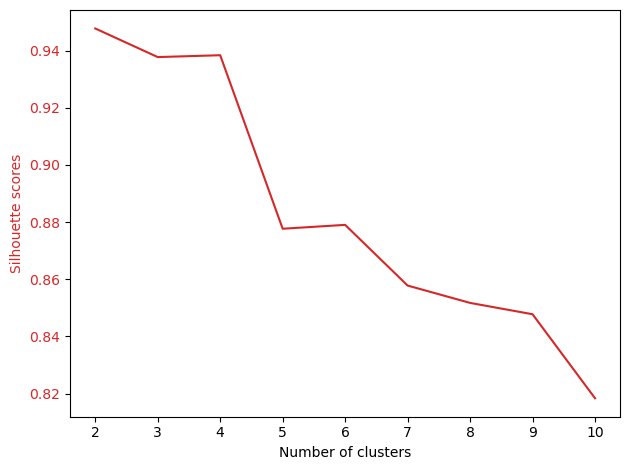

In [24]:
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores', color=color)
ax.plot(k_range, silhouette_scores, color=color)
ax.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

The silhouette scores plot tells us that we achieve the best results with 2 clusters

In [26]:
best_k = np.argmax(silhouette_scores) + 2

## 7. fit the clustering scheme to y, then produce the silhouette plot using the function plot_silhouette contained in the attached file (4pt)

In [27]:
km = KMeans(n_clusters=best_k, init='k-means++', n_init=10, max_iter=300, random_state=random_state)
y_km = km.fit_predict(X)

# fit the clustering scheme to y
km.fit(X, y=y)

KMeans(n_clusters=2, random_state=42)

Produce the silhouette plot

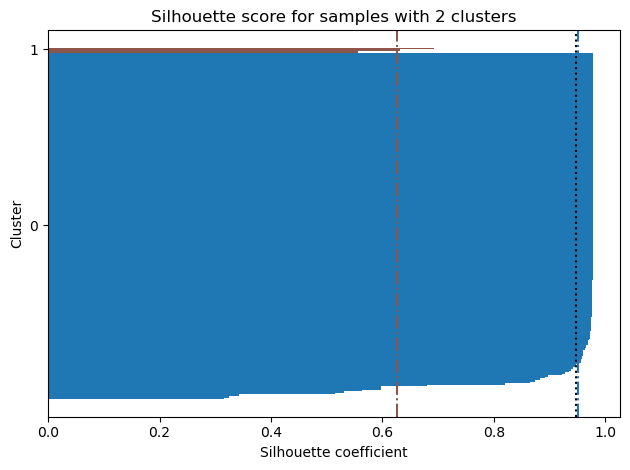

In [28]:
silhouette_score_samples = silhouette_samples(X, y_km, metric='euclidean')
plt.title(f'Silhouette score for samples with {best_k} clusters')
plot_silhouette(silhouette_score_samples, y_km)

## 8. Perform a logarithmic transformation of the data (4pt)
• _This means simply to apply the log function of numpy_

• _If one of the columns has zero or negative values, avoid its transformation_

In [30]:
for column in X.columns:
    if len(X[column]) != sum(np.greater(X[column], 0)):
        continue
    X[column] = np.log(X[column])

X.head()

,GDP at market prices (constant 2005 US$),GDP per capita (constant 2005 US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,3.156656,1.843070,1.386294,2.812617,2.843513
1,3.144241,2.118346,3.806662,-0.496462,2.700334
2,3.250605,2.128668,2.525729,1.821358,2.856602
4,3.088035,2.359912,4.394449,-0.015393,2.428680
5,3.224290,2.100320,1.029619,3.570099,2.831266


## 9. repeat point 5 and 6 above and comment the comparison with the result of point 6 (2pt)

Point 5

In [32]:
new_X = X.drop('GDP at market prices (constant 2005 US$)', axis = 1)
new_y = X['GDP at market prices (constant 2005 US$)']

Point 6

In [33]:
# Range of possible clusters
k_range = range(2,11)

# Silhouette Score as measure
silhouette_scores = []

for i in k_range:
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, random_state = random_state)
    new_y_km = km.fit_predict(new_X)
    silhouette_scores.append(silhouette_score(new_X,new_y_km))

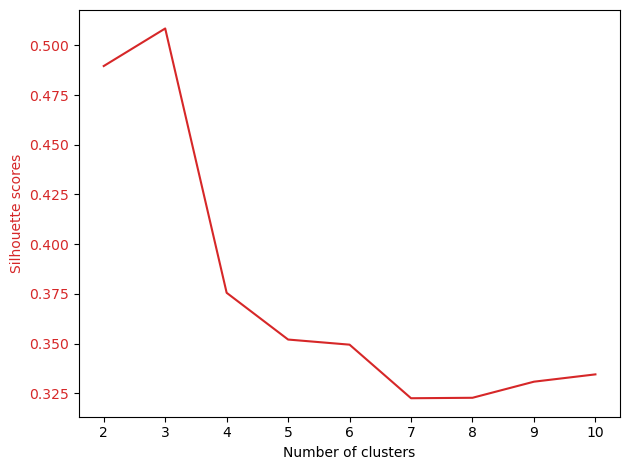

In [34]:
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores', color=color)
ax.plot(k_range, silhouette_scores, color=color)
ax.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()